In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

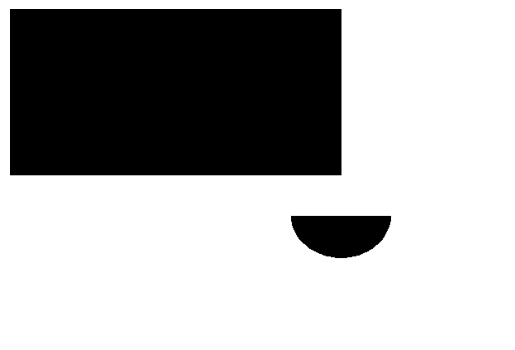

In [7]:
# Generate valid mask
img = np.zeros((400, 600))

cv2.rectangle(img, (0,0), (400,200), color=1, thickness=-1)
cv2.ellipse(img, center=(400,250), axes=(60,50), color=1, thickness=-1, angle=0, startAngle=0, endAngle=180)
img = ~(img.astype(np.bool))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.margins(0,0)
plt.show()

In [ ]:
# Inside: Shut off laser
# Outside: Multiply velocity controller in unit component direction * max(min_speed, min(1, (distance / max_distance)))

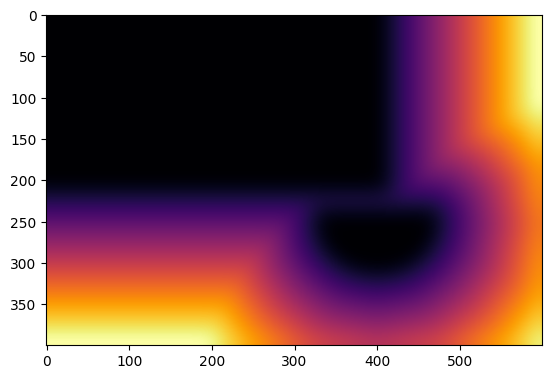

In [62]:
dst = cv2.distanceTransform(img.astype(np.uint8), cv2.DIST_L2, 5)
dst = cv2.GaussianBlur(dst, (0,0), 10)
plt.imshow(dst, cmap='inferno')
plt.show()

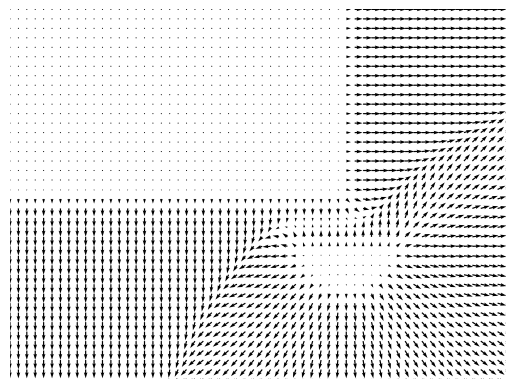

In [ ]:
dx, dy = cv2.Sobel(dst, cv2.CV_32F, 1, 0, ksize=3), cv2.Sobel(dst, cv2.CV_32F, 0, 1, ksize=3)
mag = np.sqrt(dx**2 + dy**2) + 1e-8
dx_u, dy_u = dx/mag, dy/mag

plt.quiver(dx[::10, ::10], -dy[::10, ::10]) # negative because image coords
plt.gca().invert_yaxis()
plt.axis('off')
plt.margins(0,0)
plt.show()